In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import seaborn as sns

In [ ]:
# Mount Google Drive for reading and writing files
drive.mount('/content/drive')
os.chdir("drive/My Drive/PROJECT/HealthCare/FINAL_RESULTS/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

In [ ]:
# Read in model results for each province
dien_bien = pd.read_excel('./FINAL_DIEN_BIEN_LSTM-ATT.xlsx', index_col=0)
thai_binh = pd.read_excel('./FINAL_THAI_BINH_LSTM-ATT.xlsx', index_col=0)
lao_cai = pd.read_excel('./FINAL_LAO_CAI_LSTM-ATT.xlsx', index_col=0)
kon_tum = pd.read_excel('./FINAL_KON_TUM_LSTM-ATT.xlsx', index_col=0)
cao_bang = pd.read_excel('./FINAL_CAO_BANG_LSTM-ATT.xlsx', index_col=0)

      Observed     1-month  ...  MAPE_2-month  MAPE_3-month
0   153.018070  146.087538  ...      0.135304      0.225415
1   150.519031  195.784869  ...      0.135304      0.225415
2   162.629758  173.079448  ...      0.135304      0.225415
3   178.585160  185.961117  ...      0.135304      0.225415
4   206.074587  191.284308  ...      0.135304      0.225415
5   220.876586  257.484169  ...      0.135304      0.225415
6   212.802768  256.826193  ...      0.135304      0.225415
7   219.723183  231.919899  ...      0.135304      0.225415
8   215.878508  211.520977  ...      0.135304      0.225415
9   183.006536  203.436709  ...      0.135304      0.225415
10  172.433679  177.989987  ...      0.135304      0.225415
11  178.777393  157.815586  ...      0.135304      0.225415
12  152.687762  138.241111  ...      0.135304      0.225415
13  167.746855  187.038584  ...      0.135304      0.225415
14  167.746855  200.739846  ...      0.135304      0.225415
15  166.603126  217.874221  ...      0.1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


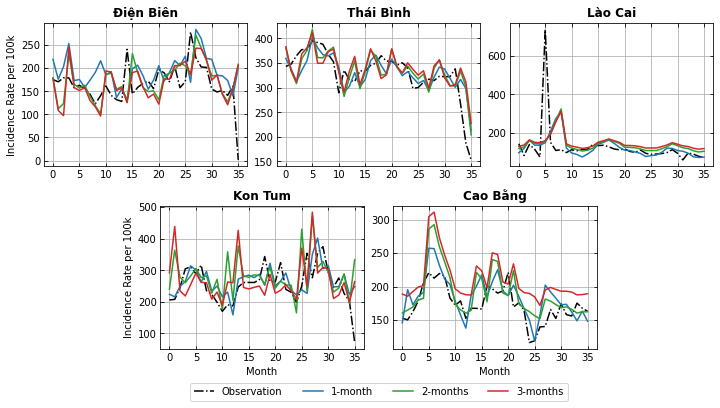

In [ ]:
# Plot style
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['figure.figsize'] = [12.0, 6.0]

# Set up plot grid to allow multiple plots in one figure
fig = plt.figure()
AX = gridspec.GridSpec(2*2,6*3)
AX.update(wspace = 3, hspace = 0.75)
ax1  = plt.subplot(AX[0:2,0:6])
ax2 = plt.subplot(AX[0:2,6:12])
ax3 = plt.subplot(AX[0:2,12:18])
ax4 = plt.subplot(AX[2:4,3:9])
ax5 = plt.subplot(AX[2:4,9:15])

# Plot Dien Bien results
ax1.plot(dien_bien[['Observed']], label='Observation', color='black', linestyle='dashdot')
ax1.plot(dien_bien[['1-month']], label='1-month', color='tab:blue')
ax1.plot(dien_bien[['2-months']], label='2-months', color='tab:green')
ax1.plot(dien_bien[['3-months']], label='3-months', color='tab:red')
ax1.grid(True)
ax1.set_title('Điện Biên', fontweight='bold')

# Plot Thai Binh results
ax2.plot(thai_binh[['Observed']], label='Observation', color='black', linestyle='dashdot')
ax2.plot(thai_binh[['1-month']], label='1-month', color='tab:blue')
ax2.plot(thai_binh[['2-months']], label='2-months', color='tab:green')
ax2.plot(thai_binh[['3-months']], label='3-months', color='tab:red')
ax2.grid(True)
ax2.set_title('Thái Bình', fontweight='bold')

# Plot Lao Cai results
ax3.plot(lao_cai[['Observed']], label='Observation', color='black', linestyle='dashdot')
ax3.plot(lao_cai[['1-month']], label='1-month', color='tab:blue')
ax3.plot(lao_cai[['2-months']], label='2-months', color='tab:green')
ax3.plot(lao_cai[['3-months']], label='3-months', color='tab:red')
ax3.grid(True)
ax3.set_title('Lào Cai', fontweight='bold')

# Plot Kon Tum results
ax4.plot(kon_tum[['Observed']], label='Observation', color='black', linestyle='dashdot')
ax4.plot(kon_tum[['1-month']], label='1-month', color='tab:blue')
ax4.plot(kon_tum[['2-months']], label='2-months', color='tab:green')
ax4.plot(kon_tum[['3-months']], label='3-months', color='tab:red')
ax4.grid(True)
ax4.set_title('Kon Tum', fontweight='bold')

# Plot Cao Bang results
ax5.plot(cao_bang[['Observed']], label='Observation', color='black', linestyle='dashdot')
ax5.plot(cao_bang[['1-month']], label='1-month', color='tab:blue')
ax5.plot(cao_bang[['2-months']], label='2-months', color='tab:green')
ax5.plot(cao_bang[['3-months']], label='3-months', color='tab:red')
ax5.grid(True)
ax5.set_title('Cao Bằng', fontweight='bold')
ax5.legend(loc='upper center', bbox_to_anchor=(-0.07, -0.2), shadow=False, ncol=4)

# Set axis labels and ticks
plt.setp([ax4, ax5], xlabel='Month')
plt.setp([ax1, ax4], ylabel='Incidence Rate per 100k')
plt.setp([ax1, ax2, ax3, ax4, ax5],xticks=(np.arange(0, 36, 5.0)))

# Plot and save
plt.tight_layout()
plt.savefig('multi_month_lstm-att.png', dpi =300)
plt.show()